In [48]:
import numpy as np
import pandas as pd

### Looking at results.csv first
The first objective required using the results.csv first. It's the biggest out of the three (3.25MB) but nothing too big for pandas to handle.

In [49]:
results = pd.read_csv("results.csv")
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False


### First thoughts
* already looks sorted along date column
* neutral column doesn't look useful
* Pretty standardized, doesn't look like the set needs but cleaning

Can use methods pretty comfortably, would want to think about scalability however.
if bigger dataset potentially use Polars or Pyspark. Could also partition the data in years.
Check for Null values and duplicates.

In [50]:
missing_values_results = results.isnull().sum()
missing_values_results

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [81]:
results.describe()
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45315 entries, 0 to 45314
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        45315 non-null  datetime64[ns]
 1   home_team   45315 non-null  object        
 2   away_team   45315 non-null  object        
 3   home_score  45315 non-null  int64         
 4   away_score  45315 non-null  int64         
 5   tournament  45315 non-null  object        
 6   city        45315 non-null  object        
 7   country     45315 non-null  object        
 8   neutral     45315 non-null  bool          
 9   key         45315 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 3.5+ MB


In [52]:
duplicates = results[results.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [date, home_team, away_team, home_score, away_score, tournament, city, country, neutral]
Index: []


No Null values, no duplicates, don't need to check for outliers
Important to know if the data is sorted or not to determine method of finding the data in range 1900 - 2000

### Challeng 1: Create a query that calculates the average number of goals per game between 1900 and 2000.

In [53]:
results["date"] = pd.to_datetime(results["date"]) # can reference date using .dt method
results = results.sort_values(by="date") # Making sure date is sorted 
results # has this changed anything?

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
45281,2023-11-21,Hong Kong,Turkmenistan,2,2,FIFA World Cup qualification,Hong Kong,Hong Kong,False
45282,2023-11-21,Philippines,Indonesia,1,1,FIFA World Cup qualification,Manila,Philippines,False
45283,2023-11-21,Vietnam,Iraq,0,1,FIFA World Cup qualification,Hanoi,Vietnam,False
45285,2023-11-21,Jordan,Saudi Arabia,0,2,FIFA World Cup qualification,Amman,Jordan,False


In [54]:
results_1900_2000 = results[(results["date"].dt.year >= 1900) & (results["date"].dt.year <= 2000)] # grab 1900 to 2000 variables
results_1900_2000

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
127,1900-02-03,Scotland,Wales,5,2,British Home Championship,Aberdeen,Scotland,False
128,1900-02-24,Wales,Northern Ireland,2,0,British Home Championship,Llandudno,Wales,False
129,1900-03-03,Northern Ireland,Scotland,0,3,British Home Championship,Belfast,Ireland,False
130,1900-03-17,Northern Ireland,England,0,2,British Home Championship,Dublin,Ireland,False
131,1900-03-26,Wales,England,1,1,British Home Championship,Cardiff,Wales,False
...,...,...,...,...,...,...,...,...,...
23834,2000-12-20,Japan,South Korea,1,1,Friendly,Tokyo,Japan,False
23835,2000-12-20,Mexico,Argentina,0,2,Friendly,Los Angeles,United States,True
23836,2000-12-22,Catalonia,Lithuania,5,0,Friendly,Barcelona,Spain,False
23837,2000-12-22,Andalusia,Morocco,2,0,Friendly,Córdoba,Spain,False


In [55]:
results_1900_2000["total_goals"] = results_1900_2000["home_score"] + results_1900_2000["away_score"] # total goals
average = np.mean(results_1900_2000["total_goals"])
average

C:\Users\drysd\AppData\Local\Temp\ipykernel_48692\2620716340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_1900_2000["total_goals"] = results_1900_2000["home_score"] + results_1900_2000["away_score"] # total goals


3.0704284750337383

### Challenge 2: Create a query that counts the number of shootouts wins by country and arrange in alphabetical order.

In [56]:
shootouts = pd.read_csv("shootouts.csv")
shootouts

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN
...,...,...,...,...,...
557,2023-07-12,United States,Panama,Panama,NaN
558,2023-09-07,Iraq,India,Iraq,NaN
559,2023-09-10,Thailand,Iraq,Iraq,NaN
560,2023-10-13,Iraq,Qatar,Qatar,NaN


In [57]:
missing_values_shootouts = shootouts.isnull().sum()
missing_values_shootouts

date               0
home_team          0
away_team          0
winner             0
first_shooter    476
dtype: int64

In [58]:
shootouts["first_shooter"].fillna("unknown", inplace=True) # could drop the column but want to keep first_shooter information, data collection practice should be flagged

In [59]:
shootouts.describe()
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           562 non-null    object
 1   home_team      562 non-null    object
 2   away_team      562 non-null    object
 3   winner         562 non-null    object
 4   first_shooter  562 non-null    object
dtypes: object(5)
memory usage: 22.1+ KB


In [60]:
duplicates = shootouts[shootouts.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [date, home_team, away_team, winner, first_shooter]
Index: []


In [61]:
shootout_wins = shootouts["winner"].value_counts().sort_index()
shootout_wins

winner
Abkhazia                2
Algeria                 7
Angola                  7
Antigua and Barbuda     2
Argentina              14
                       ..
Zambia                 13
Zanzibar                2
Zimbabwe                7
Åland                   1
Åland Islands           2
Name: count, Length: 163, dtype: int64

In [62]:
#shootout_wins.to_csv("shootout_wins.csv", index=False)

### Challenge 3: Create a reliable key that allows the joining together of goal scorers, results, and shootouts.

In [63]:
goalscorers = pd.read_csv("goalscorers.csv")
goalscorers

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
43184,2023-11-21,Greece,France,France,Youssouf Fofana,74.0,False,False
43185,2023-11-21,Kosovo,Belarus,Belarus,Dmitry Antilevsky,43.0,False,False
43186,2023-11-21,Romania,Switzerland,Romania,Denis Alibec,50.0,False,False
43187,2023-11-21,Wales,Turkey,Wales,Neco Williams,7.0,False,False


In [64]:
missing_values_goalscorers = goalscorers.isnull().sum()
missing_values_goalscorers

date           0
home_team      0
away_team      0
team           0
scorer        50
minute       260
own_goal       2
penalty        2
dtype: int64

In [65]:
goalscorers = goalscorers.dropna(subset=["scorer"]) # important as we use scorer in query
goalscorers = goalscorers.dropna(subset=["penalty"]) # important as we use penalty in query
goalscorers["minute"].fillna(0, inplace=True)

In [66]:
goalscorers.describe()
goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43138 entries, 0 to 43188
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43138 non-null  object 
 1   home_team  43138 non-null  object 
 2   away_team  43138 non-null  object 
 3   team       43138 non-null  object 
 4   scorer     43138 non-null  object 
 5   minute     43138 non-null  float64
 6   own_goal   43138 non-null  object 
 7   penalty    43138 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.0+ MB


Filled null values in minutes with 0 but could impute

In [67]:
duplicates = shootouts[shootouts.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [date, home_team, away_team, winner, first_shooter]
Index: []


At first I thought I should use date as the primary key but quickly figured out it is not a unique identifier as can be multiple matches on the same day, instead the key should differentiate the matches on the days and so should include the teams playing. 

In [68]:
goalscorers["key"] = goalscorers["date"].astype(str) + '_' + goalscorers["home_team"] + '_' + goalscorers["away_team"]
results["key"] = results["date"].astype(str) + '_' + results["home_team"] + '_' + results["away_team"]
shootouts["key"] = shootouts["date"].astype(str) + '_' + shootouts["home_team"] + '_' + shootouts["away_team"]

(goalscorers[["date", "home_team", "away_team", "key"]].head(),
 results[["date", "home_team", "away_team", "key"]].head(),
 shootouts[["date", "home_team", "away_team", "key"]].head())

(         date  home_team away_team                         key
 0  1916-07-02      Chile   Uruguay    1916-07-02_Chile_Uruguay
 1  1916-07-02      Chile   Uruguay    1916-07-02_Chile_Uruguay
 2  1916-07-02      Chile   Uruguay    1916-07-02_Chile_Uruguay
 3  1916-07-02      Chile   Uruguay    1916-07-02_Chile_Uruguay
 4  1916-07-06  Argentina     Chile  1916-07-06_Argentina_Chile,
         date home_team away_team                          key
 0 1872-11-30  Scotland   England  1872-11-30_Scotland_England
 1 1873-03-08   England  Scotland  1873-03-08_England_Scotland
 2 1874-03-07  Scotland   England  1874-03-07_Scotland_England
 3 1875-03-06   England  Scotland  1875-03-06_England_Scotland
 4 1876-03-04  Scotland   England  1876-03-04_Scotland_England,
          date    home_team         away_team  \
 0  1967-08-22        India            Taiwan   
 1  1971-11-14  South Korea  Vietnam Republic   
 2  1972-05-07  South Korea              Iraq   
 3  1972-05-17     Thailand       South 

In [69]:
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,key
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1916-07-02_Chile_Uruguay
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1916-07-02_Chile_Uruguay
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1916-07-02_Chile_Uruguay
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1916-07-02_Chile_Uruguay
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916-07-06_Argentina_Chile


In [70]:
#goalscorers.to_csv("goalscorers_with_key.csv", index=False)

### Challenge 4: Create a query that identifies which teams have won a penalty shootout after a 1-1 draw.

In [71]:
draws_1_1 = results[(results["home_score"] == 1) & (results["away_score"] == 1)] # grab just 1-1 draw
#print(draws_1_1)

draws_1_1_with_shootouts = pd.merge(draws_1_1, shootouts, on="key") # merge along the key 
#print(draws_1_1_with_shootouts)

draws_1_1_with_shootouts[["date_x", "home_team_x", "away_team_x", "winner"]]


,date_x,home_team_x,away_team_x,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1973-06-14,Guinea,Mali,Guinea
4,1973-06-14,Mauritius,Tanzania,Mauritius
...,...,...,...,...
220,2023-06-17,Guyana,Grenada,Guyana
221,2023-06-20,Saint Kitts and Nevis,French Guiana,Saint Kitts and Nevis
222,2023-07-04,India,Kuwait,India
223,2023-07-12,United States,Panama,Panama


In [72]:
#draws_1_1_with_shootouts.to_csv("draws_1_1_with_shootouts.csv", index=False)

### Challenge 5: Create a query that identifies the top goal scorer by tournament, and what percentage that equates to for all goals scored in the tournament.

In [73]:
goalscorers_results = pd.merge(goalscorers, results[["key", "tournament"]], on = "key") # Merge goalscorers with results to get the tournament information
goalscorers_results


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,key,tournament
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1916-07-02_Chile_Uruguay,Copa América
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1916-07-02_Chile_Uruguay,Copa América
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1916-07-02_Chile_Uruguay,Copa América
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1916-07-02_Chile_Uruguay,Copa América
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916-07-06_Argentina_Chile,Copa América
...,...,...,...,...,...,...,...,...,...,...
43133,2023-11-21,Greece,France,France,Youssouf Fofana,74.0,False,False,2023-11-21_Greece_France,UEFA Euro qualification
43134,2023-11-21,Kosovo,Belarus,Belarus,Dmitry Antilevsky,43.0,False,False,2023-11-21_Kosovo_Belarus,UEFA Euro qualification
43135,2023-11-21,Romania,Switzerland,Romania,Denis Alibec,50.0,False,False,2023-11-21_Romania_Switzerland,UEFA Euro qualification
43136,2023-11-21,Wales,Turkey,Wales,Neco Williams,7.0,False,False,2023-11-21_Wales_Turkey,UEFA Euro qualification


In [74]:
# Pseudocode
# Group by tournament and scorer to get total number of goals scored by each player
# calculate percentage from total goals from tournament

top_scorers_by_tournament = goalscorers_results.groupby(["tournament", "scorer"])["scorer"].count().reset_index(name="goals")
top_scorer_per_tournament = top_scorers_by_tournament.loc[top_scorers_by_tournament.groupby("tournament")["goals"].idxmax()] 
total_goals_per_tournament = goalscorers_results.groupby("tournament")["scorer"].count().reset_index(name="total_goals")
#print(total_goals_per_tournament)

top_scorer_with_percentage = pd.merge(top_scorer_per_tournament, total_goals_per_tournament, on='tournament')
top_scorer_with_percentage["percentage"] = (top_scorer_with_percentage["goals"] / top_scorer_with_percentage["total_goals"]) * 100 # percentage

top_scorer_with_percentage[["tournament", "scorer", "goals", "total_goals", "percentage"]]


,tournament,scorer,goals,total_goals,percentage
0,AFC Asian Cup,Ali Daei,14,986,1.419878
1,African Cup of Nations,Samuel Eto'o,18,1767,1.018676
2,Baltic Cup,Ēriks Pētersons,9,229,3.930131
3,British Home Championship,Geoff Hurst,4,33,12.121212
4,CONMEBOL–UEFA Cup of Champions,Claudio Caniggia,1,7,14.285714
5,Confederations Cup,Cuauhtémoc Blanco,9,423,2.127660
6,Copa América,Norberto Doroteo Méndez,17,2671,0.636466
7,FIFA World Cup,Miroslav Klose,16,2720,0.588235
8,FIFA World Cup qualification,Carlos Ruiz,39,22738,0.171519
9,Gold Cup,Landon Donovan,18,1097,1.640839


In [75]:
#top_scorer_with_percentage.to_csv("top_scorer_with_percentage.csv", index=False)

### Additional task
* create a Lambda function that is triggered from ingestion S3 bucket.
* Function creates a data quality flag column that has the issues of each row
* function then cleans the issue and then sends cleaned CSV to next S3 bucket in the precessing layer.

See AWS console for details

In [78]:
goalscorers_results["data_quality_flags"] = "No issues"
for col in goalscorers_results.columns:
    if goalscorers_results[col].isnull().any():
        goalscorers_results.loc[goalscorers_results[col].isnull(), 'data_quality_flag'] = f'Missing {col}'
goalscorers_results

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,key,tournament,data_quality_flags
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1916-07-02_Chile_Uruguay,Copa América,No issues
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1916-07-02_Chile_Uruguay,Copa América,No issues
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1916-07-02_Chile_Uruguay,Copa América,No issues
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1916-07-02_Chile_Uruguay,Copa América,No issues
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916-07-06_Argentina_Chile,Copa América,No issues
...,...,...,...,...,...,...,...,...,...,...,...
43133,2023-11-21,Greece,France,France,Youssouf Fofana,74.0,False,False,2023-11-21_Greece_France,UEFA Euro qualification,No issues
43134,2023-11-21,Kosovo,Belarus,Belarus,Dmitry Antilevsky,43.0,False,False,2023-11-21_Kosovo_Belarus,UEFA Euro qualification,No issues
43135,2023-11-21,Romania,Switzerland,Romania,Denis Alibec,50.0,False,False,2023-11-21_Romania_Switzerland,UEFA Euro qualification,No issues
43136,2023-11-21,Wales,Turkey,Wales,Neco Williams,7.0,False,False,2023-11-21_Wales_Turkey,UEFA Euro qualification,No issues


<Axes: title={'center': 'Issue Counts'}, xlabel='Issue', ylabel='Count'>

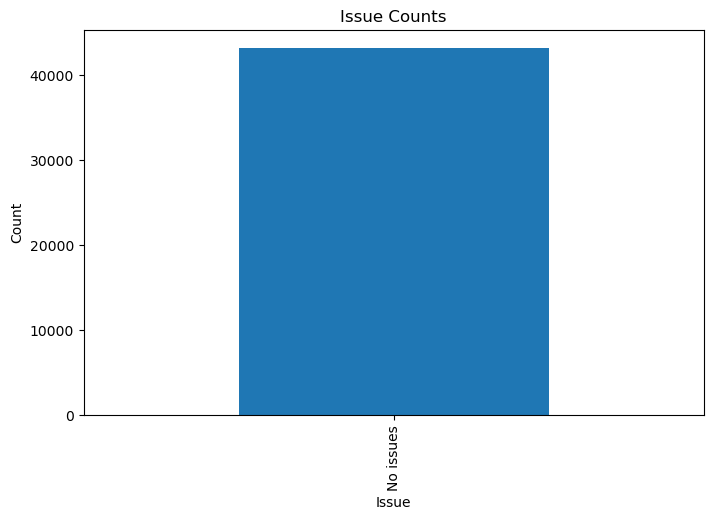

In [79]:
flags_count = goalscorers_results["data_quality_flags"].value_counts()
flags_count.plot(kind='bar', title='Issue Counts', ylabel='Count', xlabel='Issue', figsize=(8, 5))